In [1]:
import numpy as np
import matplotlib.pyplot as plt

R_Earth = 6378.1 # km
Date = 2022.057534246575342465 # date of JPL solution parameters

def read_file(filename):
    f = open(filename, 'r')
    Zeta = []
    Xi = []
    MinDistAft = []
    tMinDistAft = []
    vx = []
    vy = []
    vz = []
    for line in f:
        if "B-plane distance" in line:
            line = line.strip().split()
            Zeta.append(float(line[4]))
            Xi.append(float(line[6]))
            MinDistAft.append(float(line[10]))
            tMinDistAft.append(float(line[12]))
        if "iloop" in line:
            line = line.strip().split()
            vx.append(float(line[5]))
            vy.append(float(line[7]))
            vz.append(float(line[9]))
    f.close()
    return (Zeta, Xi, MinDistAft, tMinDistAft, vx, vy, vz)

def subtract(L1,L2): 
    return [x1-x2 for x1,x2 in zip(L1,L2)] 


In [2]:
# Read in data and merge simulation runs for LOV along and against track

Zeta29F, Xi29F, MinDAft29F, tMinDAft29F, vx29F, vy29F, vz29F = read_file('nomfor29goodlog')
Zeta360F, Xi360F, MinDAft360F, tMinDAft360F, vx360F, vy360F, vz360F = read_file('0for36goodlog')
Zeta3610F, Xi3610F, MinDAft3610F, tMinDAft3610F, vx3610F, vy3610F, vz3610F = read_file('tenfor36goodlog')
Zeta36F, Xi36F, MinDAft36F, tMinDAft36F, vx36F, vy36F, vz36F = read_file('nomfor36goodlog')
Zeta29, Xi29, MinDAft29, tMinDAft29, vx29, vy29, vz29 = read_file('nomback29goodlog')
Zeta360, Xi360, MinDAft360, tMinDAft360, vx360, vy360, vz360 = read_file('0back36goodlog')
Zeta3610, Xi3610, MinDAft3610, tMinDAft3610, vx3610, vy3610, vz3610 = read_file('tenback36goodlog')
Zeta36np, Xi36np, MinDAft36np, tMinDAft36np, vx, vy, vz = read_file('nom36bplane')
Zeta36, Xi36, MinDAft36, tMinDAft36, vx36, vy36, vz36 = read_file('nomback36goodlog')
Zeta36ytnp, Xi36ytnp, MinDAft36ytnp, tMinDAft36ytnp, vx, vy, vz = read_file('yarten36bplane')
Zeta36y0np, Xi36y0np, MinDAft36y0np, tMinDAft36y0np, vx, vy, vz = read_file('yar036bplane')
Zeta36gr, Xi36gr, MinDAft36gr, tMinDAft36gr, vx, vy, vz = read_file('noGR')
Zeta36gh, Xi36gh, MinDAft36gh, tMinDAft36gh, vx, vy, vz = read_file('noGH')
Zeta36rf, Xi36rf, MinDAft36rf, tMinDAft36rf, vx, vy, vz = read_file('noRF')
Zeta36T, Xi36T, MinDAft36T, tMinDAft36T, vx, vy, vz = read_file('noThisbe')
Zeta36D, Xi36D, MinDAft36D, tMinDAft36D, vx, vy, vz = read_file('noDavida')

Zeta36n = Zeta36F + Zeta36
MinDAft36n = MinDAft36F + MinDAft36
tMinDAft36n = tMinDAft36F + tMinDAft36
v36n = np.sqrt(np.array(vx36F + vx36)**2 + np.array(vy36F+vy36)**2 + np.array(vz36F+vz36)**2)
v36n = v36n*2*np.pi*1.5e13/(365*24*3600)
Zeta36z = Zeta360F + Zeta360
MinDAft36z = MinDAft360F + MinDAft360
tMinDAft36z = tMinDAft360F + tMinDAft360
Zeta36t = Zeta3610F + Zeta3610
MinDAft36t = MinDAft3610F + MinDAft3610
tMinDAft36t = tMinDAft3610F + tMinDAft3610
Zeta29n = Zeta29 + Zeta29F
MinDAft29n = MinDAft29 + MinDAft29F
tMinDAft29n = tMinDAft29F + tMinDAft29
v29n = np.sqrt(np.array(vx29F + vx29)**2 + np.array(vy29F+vy29)**2 + np.array(vz29F+vz29)**2)
v29n = v29n*2*np.pi*1.5e13/(365*24*3600)
print('total range: ',max(v36n) - min(v36n), 'cm/s')
print('max velocity: ',max(v36n), 'cm/s')
print('min velocity: ',min(v36n), 'cm/s')
print('standard deviation: ',np.sqrt(np.var(v36n)), 'cm/s')
print('mean: ',np.mean(v36n), 'cm/s')

total range:  0.04869372397661209 cm/s
max velocity:  2578146.2783196606 cm/s
min velocity:  2578146.2296259366 cm/s
standard deviation:  0.008350952824245654 cm/s
mean:  2578146.25391299 cm/s


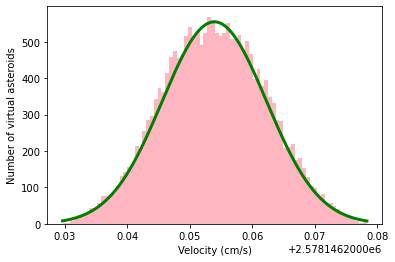

In [3]:
# Plot initial velocity distribution for particles
x = np.linspace(min(v36n),max(v36n),800)
def Gauss(x, a,b,c):
    y = a*np.exp(-(x-b)**2/(2*c**2)) 
    return y

plt.figure()
plt.hist(v36n, bins=80, color='lightpink')
plt.plot(x, Gauss(x,555,np.mean(v36n),np.sqrt(np.var(v36n))), 'g-', linewidth=3)
plt.xlabel('Velocity (cm/s)')
plt.ylabel('Number of virtual asteroids')
plt.show()

Nominal solution for perturbed 2036 Zeta: -46985841.22163099 km



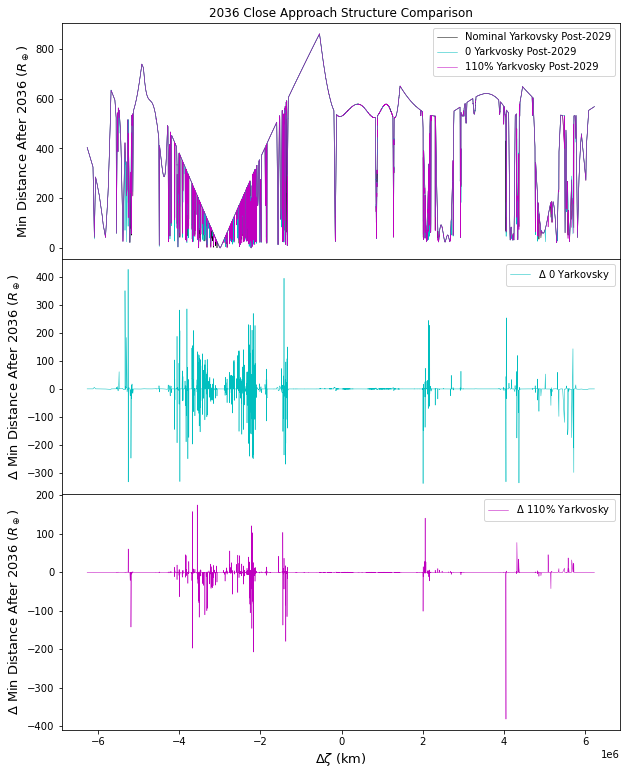

In [4]:
# Plotting the 2036 close approach structure and comparison
nomval = Zeta36F[0]
print(f"Nominal solution for perturbed 2036 Zeta: {nomval} km\n")

data= list(zip(Zeta36n,MinDAft36n))
data.sort(key=lambda tup: tup[0])
x_val = [x[0]-nomval for x in data]
y_val = [x[1] for x in data]
y_val = np.array(y_val)/R_Earth

data0= list(zip(Zeta36z,MinDAft36z))
data0.sort(key=lambda tup: tup[0])
x_val0 = [x[0]-nomval for x in data0]
y_val0 = [x[1] for x in data0]
y_val0 = np.array(y_val0)/R_Earth

data10= list(zip(Zeta36t,MinDAft36t))
data10.sort(key=lambda tup: tup[0])
x_val10 = [x[0]-nomval for x in data10]
y_val10 = [x[1] for x in data10]
y_val10 = np.array(y_val10)/R_Earth

diff0 = subtract(MinDAft36n, MinDAft36z)
diff10 = subtract(MinDAft36n, MinDAft36t)

datadiff= list(zip(Zeta36n,diff0))
datadiff.sort(key=lambda tup: tup[0])
x_valdiff = [x[0]-nomval for x in datadiff]
y_valdiff = [x[1] for x in datadiff]
y_valdiff = np.array(y_valdiff)/R_Earth

datadiff1= list(zip(Zeta36n,diff10))
datadiff1.sort(key=lambda tup: tup[0])
x_valdiff1 = [x[0]-nomval for x in datadiff1]
y_valdiff1 = [x[1] for x in datadiff1]
y_valdiff1 = np.array(y_valdiff1)/R_Earth

fig = plt.figure(figsize=(10,13))
gs = fig.add_gridspec(3, hspace=0,wspace=0)
fg = gs.subplots(sharex='col')

fg[0].set_title('2036 Close Approach Structure Comparison')
fg[0].plot(x_val,y_val, 'k', linewidth=0.5, label='Nominal Yarkovsky Post-2029')
fg[0].plot(x_val0,y_val0, 'c', linewidth=0.5, label='0 Yarkvosky Post-2029')
fg[0].plot(x_val10,y_val10, 'm', linewidth=0.5, label='110% Yarkvosky Post-2029')
fg[0].set_ylabel('Min Distance After 2036 ($R_\oplus$)', fontsize=13)
fg[0].legend()
fg[1].plot(x_valdiff, y_valdiff, 'c', linewidth=0.5, label='$\Delta$ 0 Yarkovsky')
fg[1].set_ylabel('$\Delta$ Min Distance After 2036 ($R_\oplus$)', fontsize=13)
fg[1].legend()
fg[2].plot(x_valdiff1, y_valdiff1, 'm', linewidth=0.5, label='$\Delta$ 110% Yarkvosky')
fg[2].set_xlabel('$\Delta\zeta$ (km)', fontsize=13)
fg[2].set_ylabel('$\Delta$ Min Distance After 2036 ($R_\oplus$)', fontsize=13)
fg[2].legend()
plt.show()

In [5]:
# Comparing shift in nominal zeta for different scenarios
diffbz360 = Zeta36y0np[0] - Zeta36np[0]
diffbz3610 = Zeta36ytnp[0] - Zeta36np[0]
diffbz36GR = Zeta36gr[0] - Zeta36np[0]
diffbz36GH = Zeta36gh[0] - Zeta36np[0]
diffbz36RF = Zeta36rf[0] - Zeta36np[0]
diffbz36This = Zeta36T[0] - Zeta36np[0]
diffbz36Dav = Zeta36D[0] - Zeta36np[0]

diffbx360 = Xi36y0np[0] - Xi36np[0]
diffbx3610 = Xi36ytnp[0]- Xi36np[0]
diffbx36GR = Xi36gr[0] - Xi36np[0]
diffbx36GH = Xi36gh[0] - Xi36np[0]
diffbx36RF = Xi36rf[0] - Xi36np[0]
diffbx36This = Xi36T[0] - Xi36np[0]
diffbx36Dav = Xi36D[0] - Xi36np[0]

print(f'''Differences in 2036 Zeta: 
Yarkovsky 0% {diffbz360:.2f}km, {diffbz360/Zeta36np[0]},
Yarkovsky 110% {diffbz3610:.2f}km, {diffbz3610/Zeta36np[0]},
No GR {diffbz36GR:.2f}km, {diffbz36GR/Zeta36np[0]},
No gravitational harmonics {diffbz36GH:.2f}km, {diffbz36GH/Zeta36np[0]},
No radiation forces (beta) {diffbz36RF:.2f}km, {diffbz36RF/Zeta36np[0]},
No asteroids Thisbe or smaller {diffbz36This:.2f}km, {diffbz36This/Zeta36np[0]},
No asteroids Davida or smaller {diffbz36Dav:.2f}km, {diffbz36Dav/Zeta36np[0]}

Differences in 2036 Xi: 
Yarkovsky 0% {diffbx360:.2f}km, {diffbx360/Xi36np[0]},
Yarkovsky 110% {diffbx3610:.2f}km, {diffbx3610/Xi36np[0]},
No GR {diffbx36GR:.2f}km, {diffbx36GR/Xi36np[0]},
No gravitational harmonics {diffbx36GH:.2f}km, {diffbx36GH/Xi36np[0]},
No radiation forces (beta) {diffbx36RF:.2f}km, {diffbx36RF/Xi36np[0]},
No asteroids Thisbe or smaller {diffbx36This:.2f}km, {diffbx36This/Xi36np[0]},
No asteroids Davida or smaller {diffbx36Dav:.2f}km {diffbx36Dav/Xi36np[0]}''')

print(f'Nominal Zeta: {Zeta36np}, Nominal Xi: {Xi36np}')

Differences in 2036 Zeta: 
Yarkovsky 0% 186.85km, -3.968160815197902e-06,
Yarkovsky 110% -18.68km, 3.9681681952442973e-07,
No GR -7180333.37km, 0.15249153291125916,
No gravitational harmonics 39225.78km, -0.0008330531147892374,
No radiation forces (beta) 540432.11km, -0.011477366907930534,
No asteroids Thisbe or smaller -2169.33km, 4.607079934254099e-05,
No asteroids Davida or smaller -2454.06km, 5.2117731865044204e-05

Differences in 2036 Xi: 
Yarkovsky 0% 0.13km, -8.894660844901209e-08,
Yarkovsky 110% -0.01km, 8.894007986512816e-09,
No GR 10060.56km, -0.007130907194805534,
No gravitational harmonics -31.64km, 2.242388022844815e-05,
No radiation forces (beta) 9.05km, -6.4173670599180785e-06,
No asteroids Thisbe or smaller 0.11km, -7.962106172789083e-08,
No asteroids Davida or smaller 0.02km -1.5036753223027615e-08
Nominal Zeta: [-47086767.61649585], Nominal Xi: [-1410838.9241365548]


Nominal solution for perturbed 2029 Zeta: 47360.046681998516 km


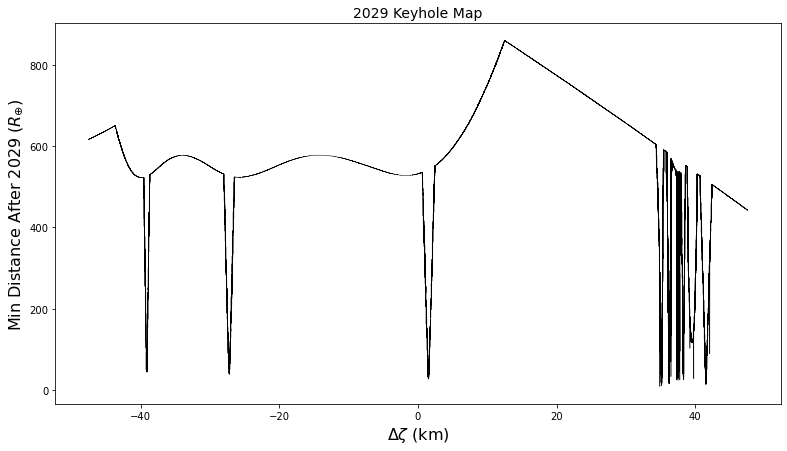

In [6]:
# Plotting the 2029 close approach structure map
nomval29 = Zeta29F[0]
print(f"Nominal solution for perturbed 2029 Zeta: {nomval29} km")

data29= list(zip(Zeta29n,MinDAft29n))
data29.sort(key=lambda tup: tup[0])
x_val29 = [x[0] for x in data29]
x_val29 = np.array(x_val29) - nomval29
y_val29 = [x[1] for x in data29]
y_val29 = np.array(y_val29)/R_Earth

plt.figure(figsize=(13,7))
plt.plot(x_val29,y_val29, 'k', linewidth=0.5)
plt.title('2029 Keyhole Map', fontsize=14)
plt.xlabel('$\Delta\zeta$ (km)', fontsize=16)
plt.ylabel('Min Distance After 2029 ($R_{\oplus}$)', fontsize=16)
#plt.plot(np.linspace(-45,45,100), np.ones(100)*100) # uncomment for close approach threshold
plt.show()

In [ ]:
# Calculating the close approach resonant spike info for 2029:
data29 = list(zip(Zeta29n,MinDAft29n, tMinDAft29n))
data29.sort(key=lambda tup: tup[0])
data29 = np.array(data29)
CA29 = data29[np.where(data29[:,1]<(100*R_Earth))]
CA29[:,0] = CA29[:,0]-Zeta29F[0]
# Search for specific resonant spikes:
keyhole = CA29[np.where((CA29[:,0]>36) & (CA29[:,0]<37))]
print('Delta zeta for resonant spike', np.mean(keyhole[:,0]))
print('Date of close approach', np.mean(keyhole[:,2])+Date)
print('Minimum distance for close approach (earth radii)',min(keyhole[:,1])/R_Earth)
print('Number of asteroids in spike',len(keyhole))

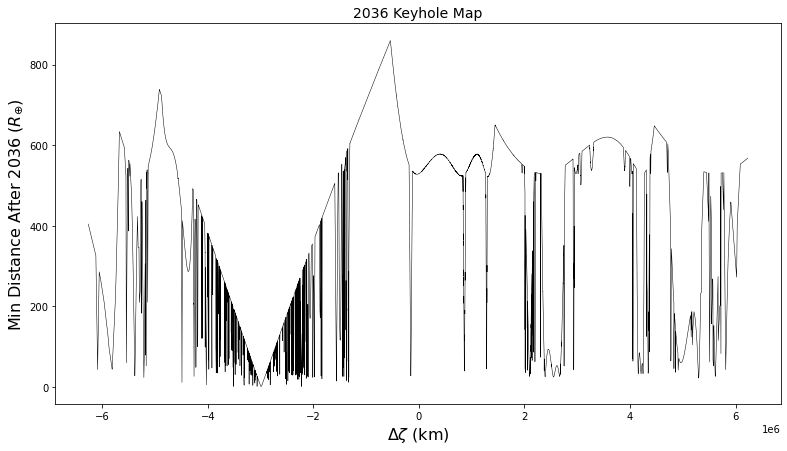

In [7]:
# Plotting just the unmodified Yarkovsky case for 2036 b-plane
plt.figure(figsize=(13,7))
plt.plot(x_val,y_val, 'k', linewidth=0.5)
plt.title('2036 Keyhole Map', fontsize=14)
plt.xlabel('$\Delta\zeta$ (km)', fontsize=16)
plt.ylabel('Min Distance After 2036 ($R_{\oplus}$)', fontsize=16)
#plt.plot(np.linspace(-6.2e6,6.2e6,10000), np.ones(10000)*50) # uncomment for close approach threshold
plt.show()

In [ ]:
# Calculating the close approach resonant spike info for 2036:
data36 = list(zip(Zeta36n,MinDAft36n, tMinDAft36n))
data36.sort(key=lambda tup: tup[0])
data36 = np.array(data36)
CA36 = data36[np.where(data36[:,1]<(50*R_Earth))]
CA36[:,0] = CA36[:,0]-Zeta36F[0]
# Search for specific resonant spikes:
keyhole = CA36[np.where((CA36[:,0]>-3.145e6) & (CA36[:,0]<-2.85e6))]
print(keyhole)
print('Delta zeta for resonant spike', np.mean(keyhole[:,0]))
print('Date of close approach', np.mean(keyhole[:,2])+Date)
print('Minimum distance for close approach (earth radii)',min(keyhole[:,1])/R_Earth)
print('Number of asteroids in spike',len(keyhole))